<a href="https://colab.research.google.com/github/andresperez86/Ejemplos-Clase-20211/blob/main/Cinem%C3%A1tica_Directa_usando_Denavit_Hartenberg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!wget --no-cache -O serialrobot.py -q https://raw.githubusercontent.com/andresperez86/Ejemplos-Clase-20211/main/serialrobot.py
from serialrobot import *

##1. Cálculo Simbólico de la Cinemática Directa

Se utilizará sympy para encontrar la matriz de transformación homogéneas de Denavit-Hartenberg (convención estándar)

In [2]:
import sympy as sp                # Biblioteca para el cálculo simbólico

def sTdh(d, th, a, alpha):
    cth = sp.cos(th); sth = sp.sin(th)
    ca = sp.cos(alpha); sa = sp.sin(alpha)
    Tdh = sp.Matrix([[cth, -ca*sth,  sa*sth, a*cth],
                     [sth,  ca*cth, -sa*cth, a*sth],
                     [0,        sa,     ca,      d],
                     [0,         0,      0,      1]])
    return Tdh

In [3]:
# Variables simbólicas
q1, q2, q3, q4 = sp.symbols("q1 q2 q3 q4")
l1, l2, l3, l4 = sp.symbols("l1 l2 l3 l4")

# Transformaciones homogéneas
T01 = sTdh(    l1,    sp.pi+q1, l2,     0)
T12 = sTdh(     0, -sp.pi/2+q2, l3,     0)
T23 = sTdh(-l4+q3,           0,  0,     0)
T34 = sTdh(     0,  sp.pi/2+q4,  0, sp.pi)

# Transformación homogénea final
Tf = sp.simplify(T01*T12*T23*T34)

# Mostrar las transformaciones homogéneas (display funciona con IPython)
print("T01:"); display(T01)
print("T12:"); display(T12)
print("T23:"); display(T23)
print("T34:"); display(T34)
print("T04:"); display(Tf)

T01:


Matrix([
[-cos(q1),  sin(q1), 0, -l2*cos(q1)],
[-sin(q1), -cos(q1), 0, -l2*sin(q1)],
[       0,        0, 1,          l1],
[       0,        0, 0,           1]])

T12:


Matrix([
[ sin(q2), cos(q2), 0,  l3*sin(q2)],
[-cos(q2), sin(q2), 0, -l3*cos(q2)],
[       0,       0, 1,           0],
[       0,       0, 0,           1]])

T23:


Matrix([
[1, 0, 0,        0],
[0, 1, 0,        0],
[0, 0, 1, -l4 + q3],
[0, 0, 0,        1]])

T34:


Matrix([
[-sin(q4), cos(q4),  0, 0],
[ cos(q4), sin(q4),  0, 0],
[       0,       0, -1, 0],
[       0,       0,  0, 1]])

T04:


Matrix([
[-cos(q1 + q2 + q4), -sin(q1 + q2 + q4),  0, -l2*cos(q1) - l3*sin(q1 + q2)],
[-sin(q1 + q2 + q4),  cos(q1 + q2 + q4),  0, -l2*sin(q1) + l3*cos(q1 + q2)],
[                 0,                  0, -1,                  l1 - l4 + q3],
[                 0,                  0,  0,                             1]])

In [4]:
# Valor cuando todos los ángulos son cero
print("T04 cuando q=(0,0,0,0):")
Tf.subs([ (q1,0), (q2,0), (q3,0), (q4,0)])

T04 cuando q=(0,0,0,0):


Matrix([
[-1, 0,  0,     -l2],
[ 0, 1,  0,      l3],
[ 0, 0, -1, l1 - l4],
[ 0, 0,  0,       1]])

##2. Cálculo Numérico de la Cinemática Directa
En este caso se utilizará numpy para el manejo de matrices y vectores

In [5]:
import numpy as np

def Tdh(d, th, a, alpha):
    cth = np.cos(th);    sth = np.sin(th)
    ca = np.cos(alpha);  sa = np.sin(alpha)
    Tdh = np.array([[cth, -ca*sth,  sa*sth, a*cth],
                    [sth,  ca*cth, -sa*cth, a*sth],
                    [0,        sa,     ca,      d],
                    [0,         0,      0,      1]])
    return Tdh

In [6]:
# Cinemática directa del robot
def cdirecta_scara(q, l1, l2, l3, l4):
    """ Retorna los sistemas de referencia de cada eslabón con respecto a la base
    """
    # Transformaciones homogéneas de DH
    T01 = Tdh(       l1,    np.pi+q[0], l2,     0)
    T12 = Tdh(        0, -np.pi/2+q[1], l3,     0)
    T23 = Tdh( -l4+q[2],             0,  0,     0)
    T34 = Tdh(        0,  np.pi/2+q[3],  0, np.pi)
    # Efector final con respecto a la base
    Tf = T01.dot(T12).dot(T23).dot(T34)
    return Tf

In [7]:
# Ejemplo de cálculo de la cinemática directa
l1 = 1.0                               # Longitud eslabón 1
l2 = 1.0                               # Longitud eslabón 2
l3 = 1.0                               # Longitud eslabón 3 
l4 = 0.5
q = [np.deg2rad(0), np.deg2rad(0), 0, np.deg2rad(0)]    # Valores articulares

# Cinemática directa
Te = cdirecta_scara(q, l1, l2, l3, l4)   # Cinemática directa

# Mostrar el resultado
print("Efector final con respecto a la base cuando q1={}, q2={}, q3={}, q4={}".format(np.rad2deg(q[0]), np.rad2deg(q[1]), 
                                                                                      q[2], np.rad2deg(q[3])))
print(np.round(Te,4))

Efector final con respecto a la base cuando q1=0.0, q2=0.0, q3=0, q4=0.0
[[-1.   0.   0.  -1. ]
 [ 0.   1.   0.   1. ]
 [ 0.   0.  -1.   0.5]
 [ 0.   0.   0.   1. ]]


##3. Gráfico del Robot SCARA
Se utilizará una clase llamada SerialRobot, donde se definirá el robot utilizando los parámetros de Denavit-Hartenberg calculados. Usando esta clase se graficará el robot. Internamente, esta clase usa matplotlib para realizar el gráfico.

In [8]:
from serialrobot import *

# Parámetros de Denavit-Hartenberg para cada articulación
# Orden de los parámetros: d, th, a, alpha. Articulaciones: 'r' (revolución), 'p' (prismática)
L = [[ l1,    np.pi, l2,     0, 'r'],
     [  0, -np.pi/2, l3,     0, 'r'],
     [-l4,        0,  0,     0, 'p'],
     [  0,  np.pi/2,  0, np.pi, 'r']]



In [9]:
scara = SerialRobot(L, name='scara')
T = scara.fkine([0,0,0,0], verbose=False)
print(np.round(T,3))

[[-1.   0.   0.  -1. ]
 [ 0.   1.   0.   1. ]
 [ 0.   0.  -1.   0.5]
 [ 0.   0.   0.   1. ]]


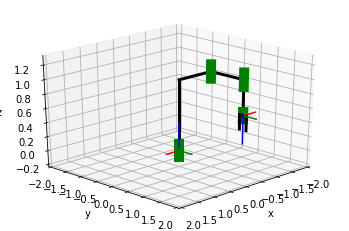

In [10]:
# "inline" permite realizar el gráfico en el mismo "notebook"
%matplotlib inline
# Se puede alternar usando la opción: %matplotlib notebook

alims = [[-2,2],[-2,2],[-0.2, 1.3]]
scara.plot([0, 0, 0, 0], axlimits=alims)

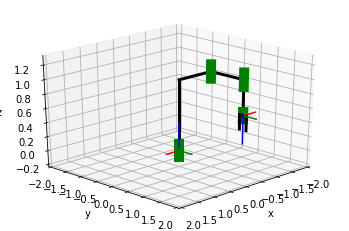

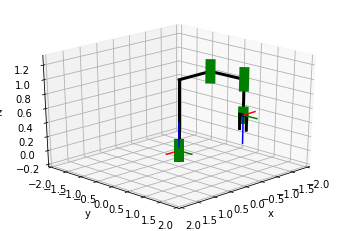

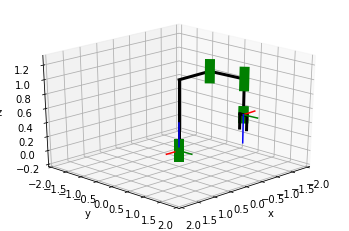

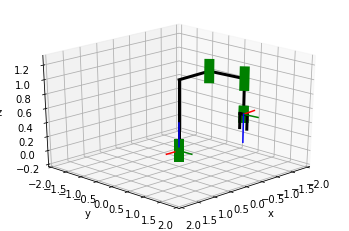

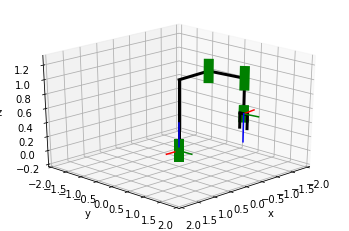

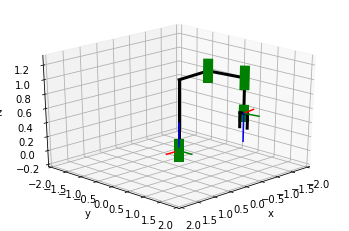

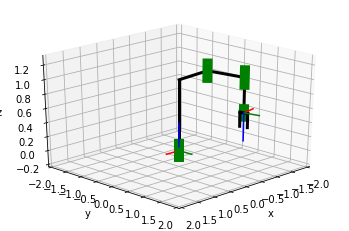

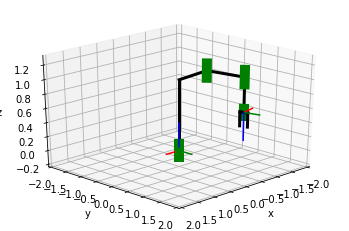

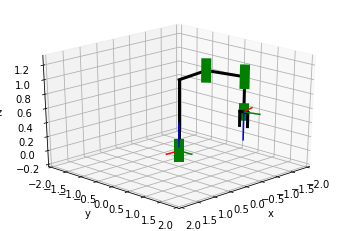

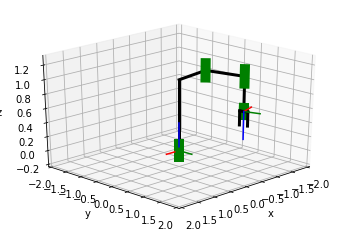

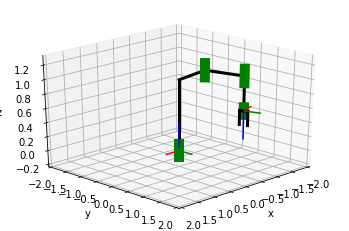

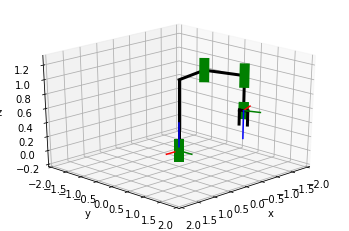

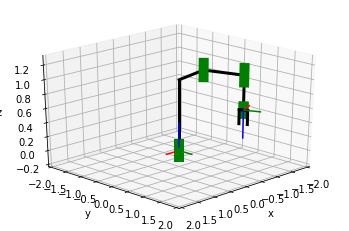

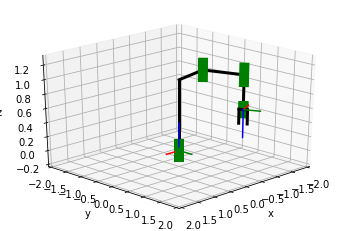

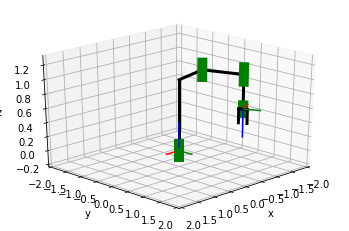

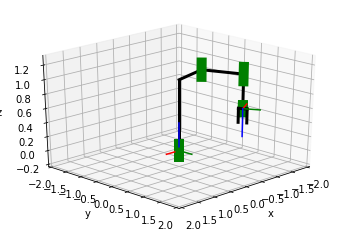

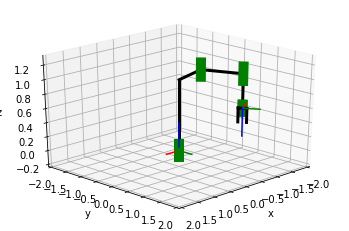

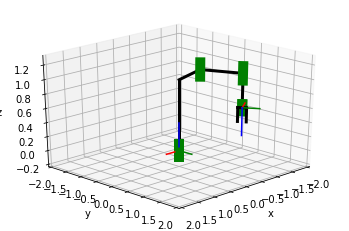

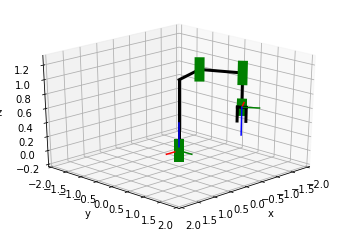

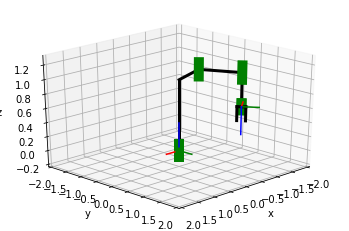

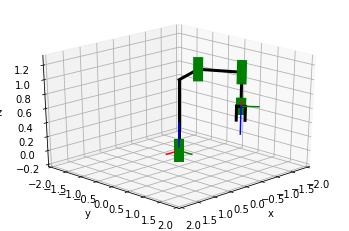

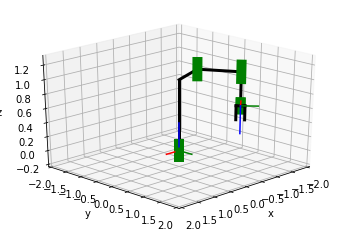

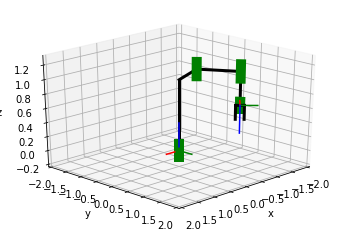

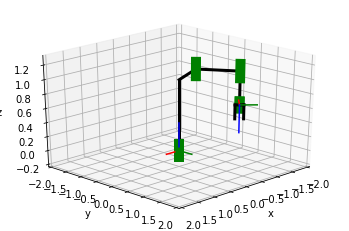

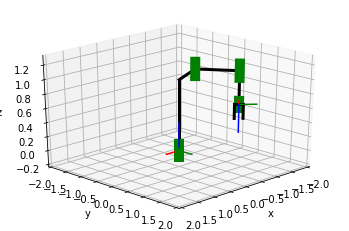

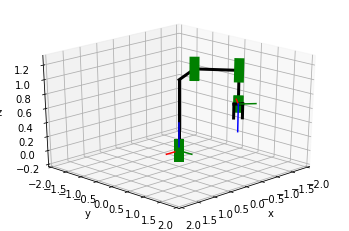

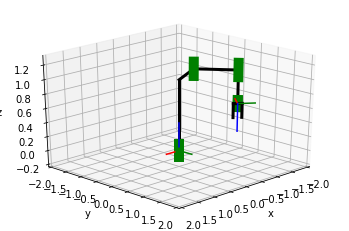

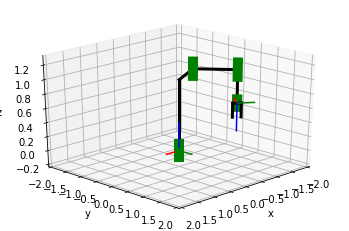

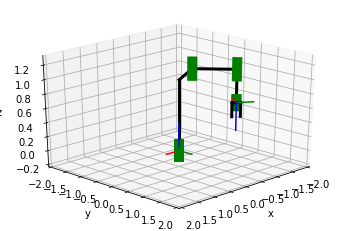

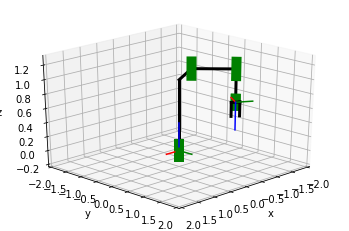

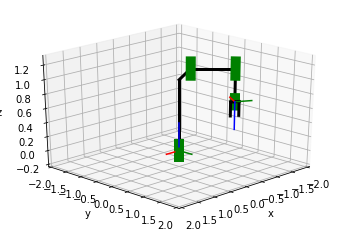

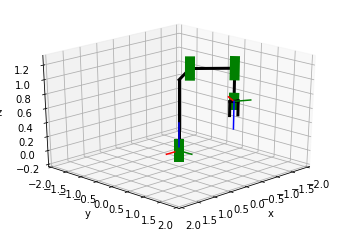

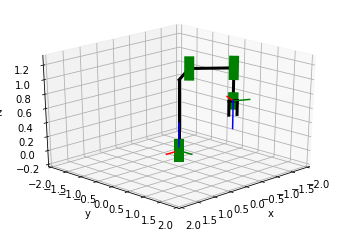

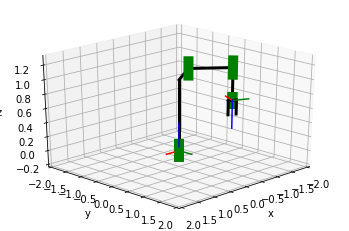

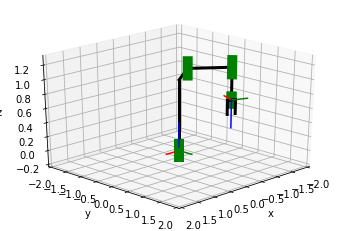

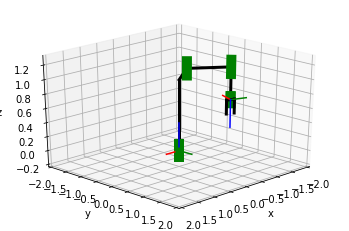

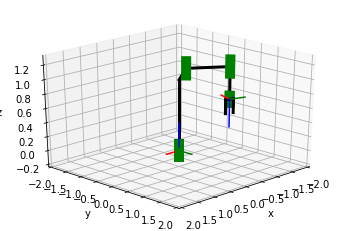

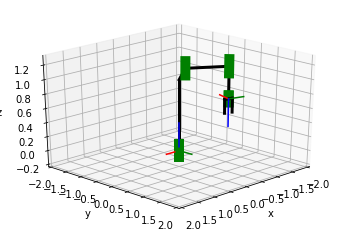

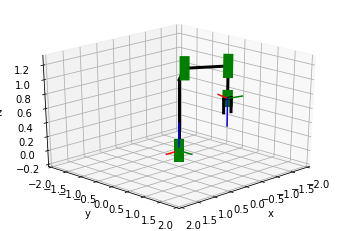

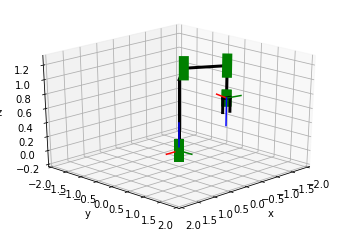

In [13]:
# Se abrirá una nueva ventana donde se visualizará el robot
for i in range(40):
    q = [np.deg2rad(i), np.deg2rad(0.5*i), 0.001*i, np.deg2rad(0.5*i)]    # En grados
    scara.plot(q, axlimits=alims)
    plt.pause(0.01)